# K-Means Clustering

In this exercise we will use KMeans clustering to create clusters in the iris dataset and then compare them with the original to see how accurate they are.

## Importing Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

## Data Preparation

In [2]:
iris = pd.read_csv('iris.csv')
iris.head()

,sepallength,sepalwidth,petallength,petalwidth,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   sepallength  150 non-null    float64
 1   sepalwidth   150 non-null    float64
 2   petallength  150 non-null    float64
 3   petalwidth   150 non-null    float64
 4   class        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [4]:
df = iris.copy()

We copy the iris dataset to perform our operations on it and compare it with the original dataset.

In [5]:
df['class'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

We see that there are 3 unique species. Now we will check whether our clustering model predicts the same.

In [6]:
df.drop(['class'], axis = 1, inplace = True)
df.head()

,sepallength,sepalwidth,petallength,petalwidth
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


We dropped the `class` column as it was redundant for our exercise.

## Model Development

First we will run the Hopkin's Clustering Test on the dataset. We begin by defining the `hopkins()` function.

In [7]:
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
from math import isnan
 
def hopkins(X):
    d = X.shape[1] # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

Since Hopkin's test produces a slightly different value each time we will iterate it for `1000` times and then take its mean.

In [8]:
hopkins_stat = []
for i in range(1000):
    hopkins_stat.append(hopkins(df))
    
sum(hopkins_stat)/len(hopkins_stat)

0.842680849830881

The mean value is `0.84` which means our dataset has a high tendency for clustering. Now we will train the model. We will use elbow curve method for determining the number of clusters.

In [9]:
from sklearn.cluster import KMeans

If we set number of clusters as `1` we will get an error so we will calculate it manually. For `n_clusters = 1` the data will have a single centroid and we have to calculate the sum of the square of distance between the centroid and the remaining data points. First we will calculate the centroid.

In [10]:
centroid = np.mean(df, axis = 0)
centroid = centroid.values
centroid

array([5.84333333, 3.054     , 3.75866667, 1.19866667])

Now we will create two UDFs to calculate the distance between 2 points and the sum of those distances.

In [11]:
def euclidean_distance(point1, point2):
    """Calculate the Euclidean distance between two points."""
    return np.sqrt(np.sum((point1 - point2)**2))

def sum_euclidean_distance(centroid, data_points):
    """Calculate the sum of Euclidean distances between the centroid and all data points."""
    sum_distance = 0
    for point in data_points:
        sum_distance += euclidean_distance(centroid, point)
    return sum_distance

In [12]:
sum_euclidean_distance(centroid, df.values)

291.4551238555539

The inertia for `n_clusters = 1` is `291.45`. We will insert that value in the list of inertias.

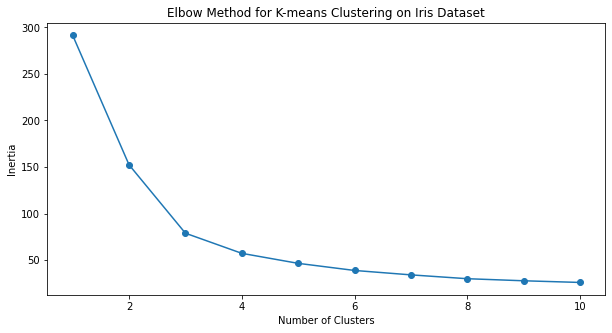

In [13]:
# Define a list of number of clusters to try
n_clusters = range(2, 11)

# Initialize an list with inertia value for n = 1 to store the inertia values for other n
inertias = [291.45]

# Perform K-means clustering for different number of clusters
for n in n_clusters:
    kmeans = KMeans(n_clusters=n, init='k-means++', max_iter=300, random_state=0)
    kmeans.fit(df)
    inertias.append(kmeans.inertia_)

# Plot the inertia values vs. number of clusters
plt.figure(figsize = (10,5))
plt.plot(range(1,11), inertias, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for K-means Clustering on Iris Dataset')
plt.show()

The elbow point is at `n = 3` which is in accordance with our dataset. We will now train the model for 3 clusters and then compare the results with original dataset.

In [14]:
kmeans_3 = KMeans(n_clusters = 3, init='k-means++', max_iter=300, random_state=0)
kmeans_3.fit(df)

KMeans(n_clusters=3, random_state=0)

In [15]:
kmeans_3.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

In [16]:
kmeans_3.cluster_centers_

array([[5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [5.006     , 3.418     , 1.464     , 0.244     ],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

These are the cluster centroids.

In [17]:
df['cluster'] = kmeans_3.labels_
df.head()

,sepallength,sepalwidth,petallength,petalwidth,cluster
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1


## Result Verification

First we will plot the scatterplot of `sepallength` vs `sepalwidth` of both datasets side by side with hue as `class`.

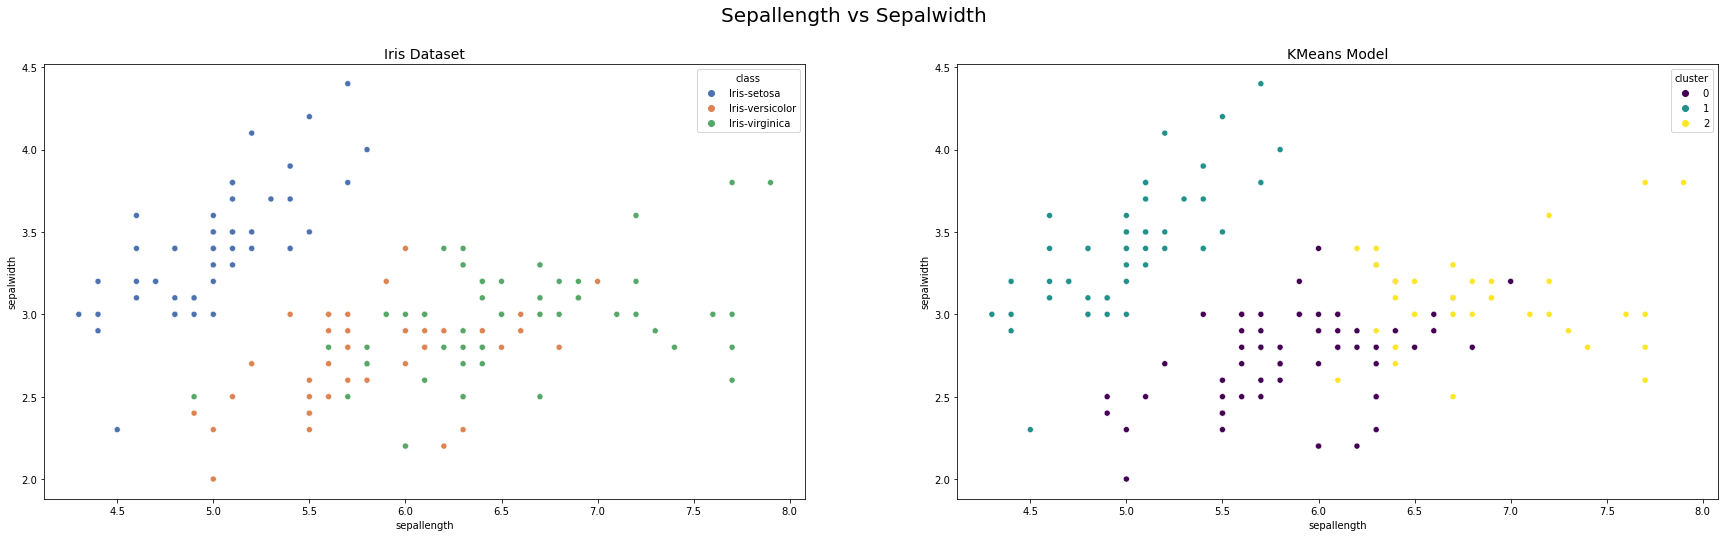

In [18]:
plt.figure(figsize=(30,8))

plt.subplot(1,2,1)
sns.scatterplot(x = 'sepallength', y = 'sepalwidth', data = iris, hue = 'class', palette = 'deep')
plt.title('Iris Dataset', fontsize = 14)
plt.legend(title = 'class', bbox_to_anchor=(1, 1), loc = 0)

plt.subplot(1,2,2)
sns.scatterplot(x = 'sepallength', y = 'sepalwidth', data = df, hue = 'cluster', palette = 'viridis')
plt.title('KMeans Model', fontsize = 14)
plt.legend(title = 'cluster', bbox_to_anchor=(1, 1), loc = 0)

plt.suptitle("Sepallength vs Sepalwidth", fontsize = 20)
plt.show()

Our model did a great job at creating the clusters. Now we will check the `petallength` vs `petalwidth` graph.

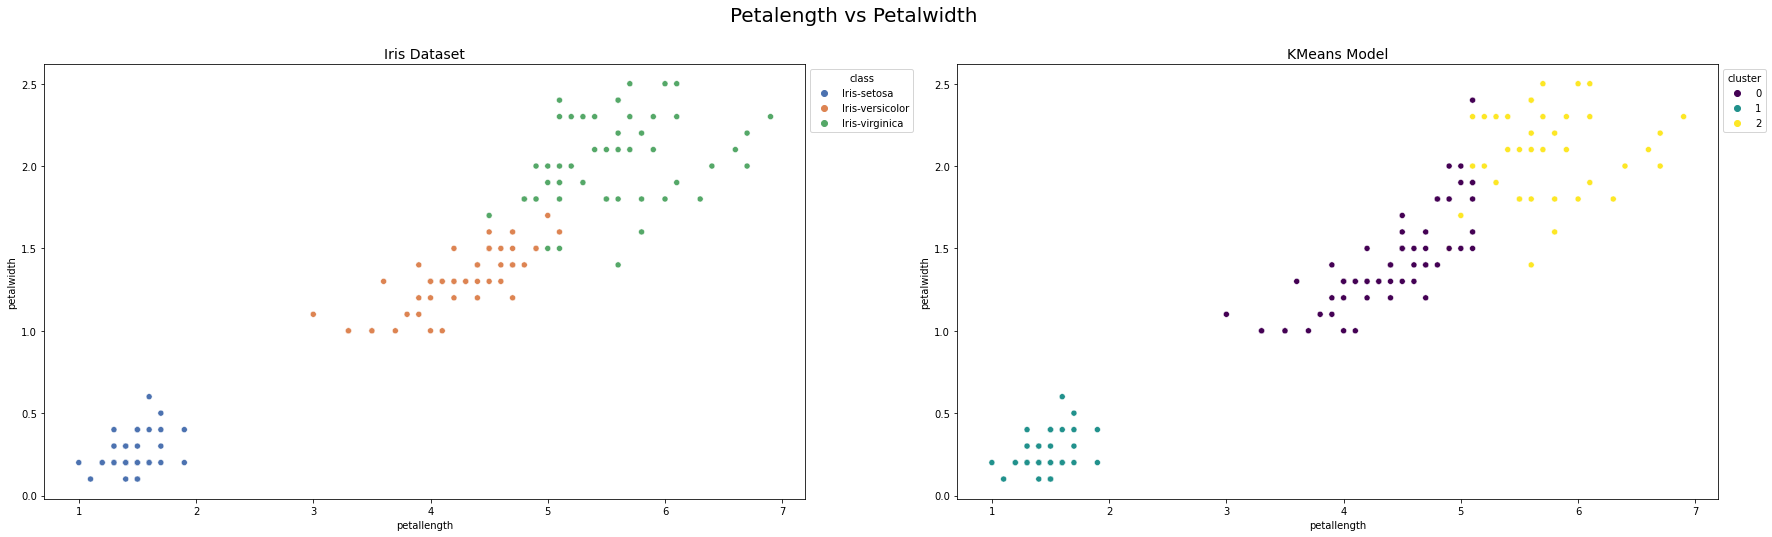

In [19]:
plt.figure(figsize=(30,8))

plt.subplot(1,2,1)
sns.scatterplot(x = 'petallength', y = 'petalwidth', data = iris, hue = 'class', palette = 'deep')
plt.title('Iris Dataset', fontsize = 14)
plt.legend(title = 'class', bbox_to_anchor=(1, 1))

plt.subplot(1,2,2)
sns.scatterplot(x = 'petallength', y = 'petalwidth', data = df, hue = 'cluster', palette = 'viridis')
plt.title('KMeans Model', fontsize = 14)
plt.legend(title = 'cluster', bbox_to_anchor=(1, 1))

plt.suptitle("Petalength vs Petalwidth", fontsize = 20)
plt.show()

From both the plots, even though there were some mistakes, we can conclude that our model did a great job of creating the clusters for our data. We observe that `cluster 1` represents `setosa`, `cluster 0` represents `versicolor` and `cluster 2` represents `virginica`.